In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Importing our dataset
dataset=pd.read_csv('C:\\Users\\Aayush Kandpal\\Downloads\\P16-Self-Organizing-Maps\\Self_Organizing_Maps\\Credit_Card_Applications.csv')

In [3]:
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [4]:
#Checking for missing values
dataset.count()
# From the below result you can see that there are no missing values ,good

CustomerID    690
A1            690
A2            690
A3            690
A4            690
A5            690
A6            690
A7            690
A8            690
A9            690
A10           690
A11           690
A12           690
A13           690
A14           690
Class         690
dtype: int64

In [5]:
# We are using SOM so this is a part of unsupervised learning( We are only using x in the model , in my next book I will 
#  use an Artificial neural network ( Supervised learning and try and show you the comparison)
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values


In [7]:
# Feature scaling our data using MinMaxSclaer
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1)) # MEntioning 0,1 is not really necessary but it is is a good habit
x=sc.fit_transform(x)

In [8]:
# We will be using a library called Minisom which is a simple and basic SOM, In Upcoming notebooks I will use boltzmann machines and 
# and autoencoders.
# To decide the parameters look at the documentation

from minisom import MiniSom
ms=MiniSom(15,15,learning_rate=0.5,input_len=15,sigma=1.0,random_seed=0)
 # Inititlaising with a random weight
ms.random_weights_init(x)
ms.train_random(data=x,num_iteration=100)




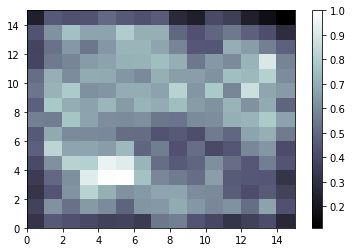

In [9]:
# Visualisng the results
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(ms.distance_map().T)
colorbar()
 
# The plot below basically shows yout the outliers (MEAN INTERNEURON DISTANCES (MID) ) 
# THE VALUES ARE BETWEEN 0,1 BECUASE THE VALUES HAVE BEEN SCALED AS YOU MAY HAVE SEEN BEFORE
# Greater the MID meaning they are less likely to be a part of a cluster hence are potential frauds





In [10]:
mappings=ms.win_map(x)

In [23]:
frauds=np.concatenate((mappings[(4,3)],mappings[(5,3)],mappings[(4,4)],mappings[(5,4)],mappings[(13,11)]),axis=0)
frauds=sc.inverse_transform(frauds)
frauds=pd.DataFrame(frauds)



In [15]:
# Potential frauds predicted based on outliers that we had found. Since these algorith uses K_mean clustering the 
#       output is higly dependent on what you treat as an outlier in your dataset


In [27]:
x=pd.DataFrame(x)
s1 = pd.merge(x, frauds, how='inner', on=[0]) # To find out the common users from both the lsit
 # You can use inverse transform before to get the ID , I have simply presented the sclaed output 
    # Our model says that about 25 people could potentially lead to fraud but that is becuase we have assumed only 4 outliers
    # If you increase the number of outliers the fraud prediction number will go up as the algortihm is dependent on K-means clustering


In [24]:
frauds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.344990,0.0,0.375940,0.053571,0.5,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.5,0.0380,0.00000
1,0.602125,0.0,0.127820,0.044643,0.0,0.000000,0.000,0.114035,0.0,0.0,0.000000,0.0,0.5,0.1400,0.00000
2,0.428156,0.0,0.345865,0.168214,0.5,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.5,0.0800,0.00000
3,0.747330,0.0,0.110226,0.178571,0.0,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.5,0.0000,0.00000
4,0.684017,0.0,0.267970,0.401786,0.5,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.5,0.0920,0.05200
5,0.854899,0.0,0.204211,0.059464,0.5,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.5,0.1700,0.00001
6,0.182978,0.0,0.147820,0.020893,0.0,0.000000,0.000,0.004386,0.0,0.0,0.000000,0.0,0.5,0.0600,0.00087
7,0.283267,0.0,0.577744,0.000000,0.0,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.5,0.0000,0.00000
8,0.172996,0.0,0.058947,0.000000,0.0,0.307692,0.000,0.000000,0.0,0.0,0.000000,0.0,0.5,0.0430,0.00000
9,0.198543,0.0,0.062707,0.364643,0.5,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.5,0.0000,0.00050


In [32]:
s1 (# These are the credit card users that could potentially lead to fraud)

,0,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,5_y,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13_y,14_y
0,0.080651,1.0,0.398496,0.767857,0.5,0.692308,1.000,0.701754,1.0,1.0,...,0.692308,1.000,0.701754,1.0,1.0,0.164179,0.0,0.5,0.0000,0.01200
1,0.098987,0.0,0.169173,0.031250,0.5,1.000000,0.875,0.036491,1.0,0.0,...,1.000000,0.875,0.036491,1.0,0.0,0.000000,1.0,0.5,0.0800,0.05860
2,0.344990,0.0,0.375940,0.053571,0.5,0.000000,0.000,0.000000,0.0,0.0,...,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.5,0.0380,0.00000
3,0.602125,0.0,0.127820,0.044643,0.0,0.000000,0.000,0.114035,0.0,0.0,...,0.000000,0.000,0.114035,0.0,0.0,0.000000,0.0,0.5,0.1400,0.00000
4,0.719424,0.0,0.290677,0.058036,0.5,0.076923,0.375,0.018947,0.0,0.0,...,0.076923,0.375,0.018947,0.0,0.0,0.000000,1.0,0.5,0.0000,0.00000
5,0.356030,0.0,0.595188,0.005893,0.5,0.000000,0.000,0.000000,0.0,0.0,...,0.000000,0.000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0310,0.00027
6,0.428156,0.0,0.345865,0.168214,0.5,0.000000,0.000,0.000000,0.0,0.0,...,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.5,0.0800,0.00000
7,0.110644,0.0,0.373383,0.178571,0.5,0.923077,0.375,0.473684,1.0,0.0,...,0.923077,0.375,0.473684,1.0,0.0,0.000000,1.0,0.5,0.4900,0.00000
8,0.747330,0.0,0.110226,0.178571,0.0,0.000000,0.000,0.000000,0.0,0.0,...,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.5,0.0000,0.00000
9,0.949649,0.0,0.248120,0.196429,0.5,0.230769,0.375,0.192982,0.0,0.0,...,0.230769,0.375,0.192982,0.0,0.0,0.000000,1.0,0.0,0.0500,0.00000
